In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import wandb

In [27]:
# project = "Elissabeth Long Lookup 2"
project = "Elissabeth Makemore"
# model_id = ("450477j2", "zmvq0t6h", "3i8b4895", "7279qw54", "rfk3f1xw", "vce6mrt8")
# names = ("No kernel", r"$\mathbb{C}$-exp", "exp-decay", "exp", "MSC", "Cosine")
model_id = ("qxanmkpq", "c7lx4wrb", "6ulpivzv", "b8m0i9cc", "zmvq0t6h")
names = ("$p=1$", "$p=2$", "$p=3$", "$p=4$", "$p=5$")

In [28]:
api = wandb.Api()

In [29]:
def get_metric(run, name: str) -> np.ndarray:
    return np.array([row[name] for row in run.scan_history(keys=[name])])

In [30]:
train_acc = []
val_acc = []
train_loss = []
val_loss = []

for ids in model_id:
    run = api.run(f"krieg-team/{project}/{ids}")

    train_acc.append(get_metric(run, "train/accuracy"))
    val_acc.append(get_metric(run, "validation/accuracy"))
    train_loss.append(get_metric(run, "train/loss"))
    val_loss.append(get_metric(run, "validation/loss"))

AttributeError: 'list' object has no attribute 'shape'

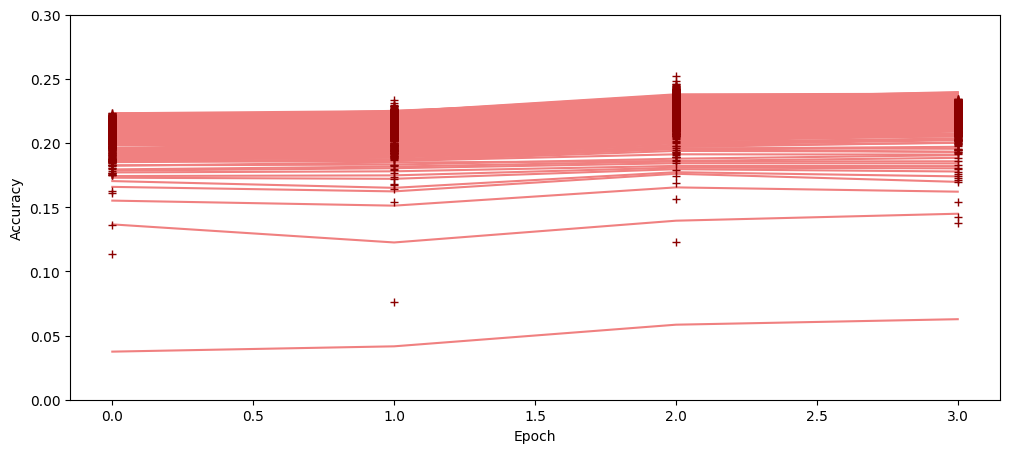

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.plot(train_acc, "-", label="train accuracy", color="lightcoral")
ax.plot(val_acc, "+", label="validation accuracy", color="darkred")
ax.plot([], "-", label="train loss", color="lightgreen")
ax.plot([], "x", label="validation loss", color="darkgreen")
ax.set_xlabel("Epoch")
ax.set_ylim(0, .3)
ax.set_ylabel("Accuracy")
ax.set_xlim(-5, train_acc.shape[0]+5)
ax.set_xticks([i*1000 for i in range(train_acc.shape[0]//1000+1)])
ax.legend(loc="lower left")

twinax = ax.twinx()
twinax.plot(train_loss, "-", label="train loss", color="lightgreen")
twinax.plot(val_loss, "x", label="validation loss", color="darkgreen")
# twinax.set_yscale("log")
twinax.set_ylim(1.9, 3.5)
twinax.set_ylabel("Loss", rotation=270)

# plt.savefig(
#     Path.cwd() / f"metrics_{model_id}.pdf",
#     bbox_inches="tight",
#     facecolor=(0, 0, 0, 0),
# )
plt.show()

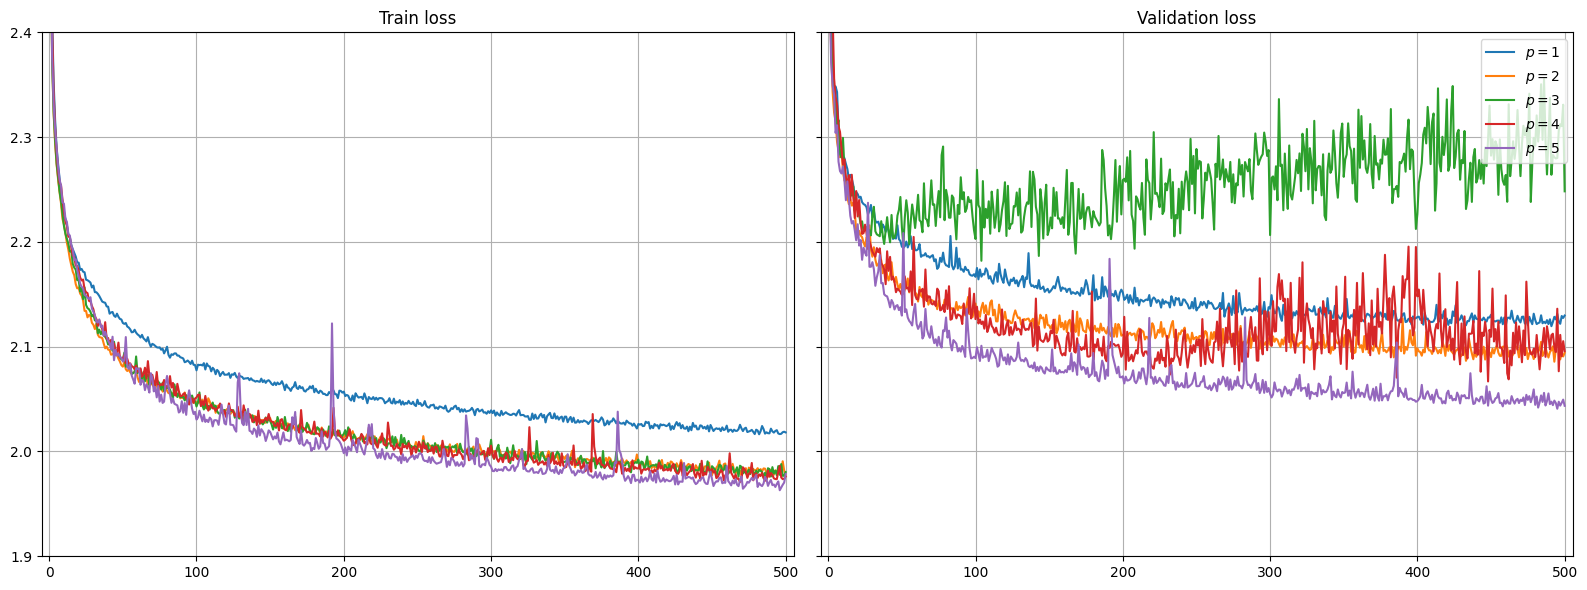

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

cmap = plt.get_cmap("tab10")
for i in range(len(model_id)):
    ax[0].plot(
        train_loss[i],
        "-",
        # label=f"train {names[i] if names is not None else model_id[i]}",
        color=cmap(i)[:3],# + (0.3, ),
    )
    ax[0].set_xlim(-5, train_loss[i].shape[0]+5)
    ax[0].set_xticks([i*100 for i in range(train_loss[i].shape[0]//100+1)])
for i in range(len(model_id)):
    ax[1].plot(
        val_loss[i],
        "-",
        label=f"{names[i] if names is not None else model_id[i]}",
        color=cmap(i),
    )
    ax[1].set_xlim(-5, train_loss[i].shape[0]+5)
    ax[1].set_xticks([i*100 for i in range(train_loss[i].shape[0]//100+1)])
    ax[1].set_ylim(1.9, 2.4)
    ax[1].legend(loc="upper right")
ax[0].set_title("Train loss")
ax[0].grid()
ax[1].set_title("Validation loss")
ax[1].grid()
fig.tight_layout()
plt.savefig(
    Path.cwd() / f"metrics_makemore_comparison.pdf",
    bbox_inches="tight",
    facecolor=(0, 0, 0, 0),
)